In [1]:
import glob

In [2]:
splits = glob.glob("../datasets/objectron_96x96/*/")
splits = [x.split("/")[-2] for x in splits]
splits

['train', 'test', 'valid']

In [3]:
split = splits[0]
categories = glob.glob(f"../datasets/objectron_96x96/{split}/*/")
categories = [x.split("/")[-2] for x in categories]
categories

['shoe',
 'bike',
 'cup',
 'book',
 'cereal_box',
 'chair',
 'bottle',
 'camera',
 'laptop']

In [4]:
category = categories[0]
files = glob.glob(f"../datasets/objectron_96x96/{split}/{category}/*.jpg")
len(files)

152950

In [5]:
import os 
basenames = [os.path.basename(x) for x in files]

In [6]:
basename = basenames[0]
basename

'batch-31_17_30.jpg'

In [7]:
def get_basenames(category, split="train"):
    files = glob.glob(f"../datasets/objectron_96x96/{split}/{category}/*.jpg")
    basenames = [os.path.basename(x) for x in files]
    return basenames



In [8]:
sequences = {}
for basename in basenames:
    sequence_id = "_".join([basename.split("_")[-3],basename.split("_")[-2]])
    sequences[sequence_id] = basename
    break
sequences

{'batch-31_17': 'batch-31_17_30.jpg'}

In [9]:
def get_sequences(category, split="train"):
    basenames = get_basenames(category)
    sequences = {}
    for basename in basenames:
        sequence_id = "_".join([basename.split("_")[-3],basename.split("_")[-2]])
        if sequence_id in sequences:
            sequences[sequence_id].append(basename)
        else:
            sequences[sequence_id] = [basename]
    return sequences

In [10]:
shoe_sequences = get_sequences("shoe")
#shoe_sequences["batch-49_41"]

In [11]:
sequences_by_categories = {}
for category in categories:
    sequences_by_categories[category] = get_sequences(category)

In [12]:
sequences_by_categories["book"]["batch-16_9"][2]

'batch-16_9_204.jpg'

In [13]:
samples = []
for category in categories:
    number_of_pictures = 0
    for sequence in sequences_by_categories[category]:
        number_of_pictures+=len(sequences_by_categories[category][sequence])
        for basename in sequences_by_categories[category][sequence]:
            sample = {"category": category, "sequence": sequence, "basename": basename, "split": split}
            samples.append(sample)
    print(f"Category {category} has {len(sequences_by_categories[category])} sequences, for a total of {number_of_pictures} pictures")
    
print(f"Total of {len(samples)} samples")

Category shoe has 3575 sequences, for a total of 152950 pictures
Category bike has 477 sequences, for a total of 23569 pictures
Category cup has 2202 sequences, for a total of 82384 pictures
Category book has 2015 sequences, for a total of 86622 pictures
Category cereal_box has 1587 sequences, for a total of 59592 pictures
Category chair has 1922 sequences, for a total of 73955 pictures
Category bottle has 1904 sequences, for a total of 70885 pictures
Category camera has 814 sequences, for a total of 35006 pictures
Category laptop has 1471 sequences, for a total of 73095 pictures
Total of 658058 samples


In [14]:
import random
idx = random.randint(0,len(samples))
idx

399641

In [15]:

samples[idx]

{'category': 'cereal_box',
 'sequence': 'batch-21_2',
 'basename': 'batch-21_2_144.jpg',
 'split': 'train'}

In [16]:
category = samples[idx]["category"]
category

'cereal_box'

In [17]:
sequence = samples[idx]["sequence"]
sequence

'batch-21_2'

In [18]:

random.sample(sequences_by_categories[category][sequence], 1)[0]

'batch-21_2_72.jpg'

In [19]:
basename = samples[idx]["basename"]
basename

'batch-21_2_144.jpg'

In [20]:
root = "../datasets/objectron_96x96"
image_path = f"{root}/{split}/{category}/{basename}"
image_path

'../datasets/objectron_96x96/train/cereal_box/batch-21_2_144.jpg'

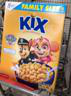

In [21]:
from PIL import Image
Image.open(image_path)

In [22]:
def get_pair_of_filenames(sample, root):
    split = sample["split"]
    sequence = sample["sequence"]
    basename = sample["basename"]
    image_path1 = f"{root}/{split}/{category}/{basename}"
    other_basename = random.sample(sequences_by_categories[category][sequence], 1)[0]
    image_path2 = f"{root}/{split}/{category}/{other_basename}"
    return image_path1, image_path2
filename1, filename2 = get_pair_of_filenames(samples[idx], root)
filename1, filename2

('../datasets/objectron_96x96/train/cereal_box/batch-21_2_144.jpg',
 '../datasets/objectron_96x96/train/cereal_box/batch-21_2_126.jpg')

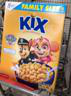

In [23]:
Image.open(filename1)

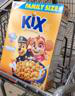

In [24]:
Image.open(filename2) 

In [199]:
categories.index("laptop")

8

In [25]:
def load_samples(sequences_by_categories, split="train", debug=True):
    samples = []
    for category in self.categories:
        number_of_pictures = 0
        for sequence in self.sequences_by_categories[category]:
            if len(self.sequences_by_categories[category][sequence])>5:
                number_of_pictures+=len(self.sequences_by_categories[category][sequence])
                for basename in self.sequences_by_categories[category][sequence]:
                    sample = {"category": category, "sequence": sequence, "basename": basename, "split": split}
                    samples.append(sample)
            else:
                print(f"Skipping {category}/{sequence} : Not enought samples!")
        print(f"Category {category} has {len(self.sequences_by_categories[category])} sequences, for a total of {self.number_of_pictures} pictures")

    print(f"Total of {len(samples)} samples")
    return samples

In [ ]:
load_samples("train")